<a href="https://colab.research.google.com/github/kesavsabari/ML/blob/main/Telecom_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom Customer Churn Classifier


#Data Analysis and Preprocessing

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.metrics

##Defining Business Problem

##Data Collection

In [4]:
df = pd.read_csv("/content/Telco_Cusomer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

In [29]:
df_train.shape

(5282, 21)

##Data Exploration

###Data Types

In [64]:
df_train.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,category
PhoneService,object
MultipleLines,category
InternetService,category
OnlineSecurity,object


In [38]:
df_train.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###Visualisation

/tmp/ipython-input-1673592961.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = df_train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()


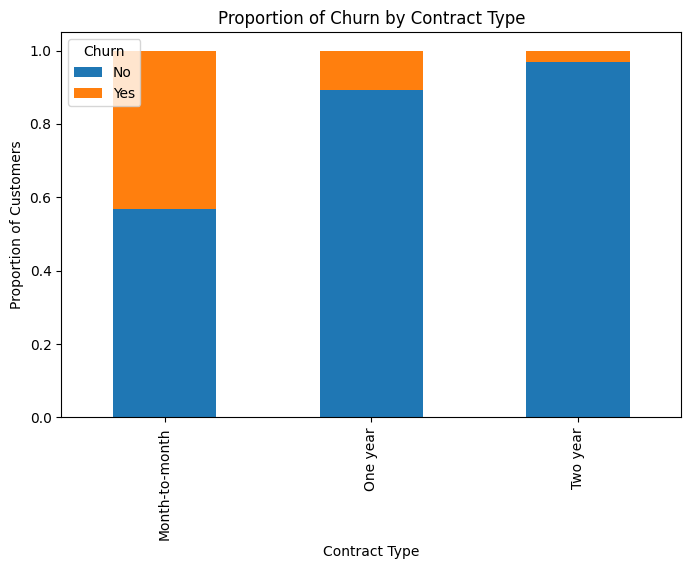

In [43]:
df_train['Churn'] = df_train['Churn'].astype('category')
df_train['Contract'] = df_train['Contract'].astype('category')

contract_churn = df_train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Proportion of Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Proportion of Customers")
plt.legend(title='Churn')
plt.show()

/tmp/ipython-input-1004266519.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = df_train.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()


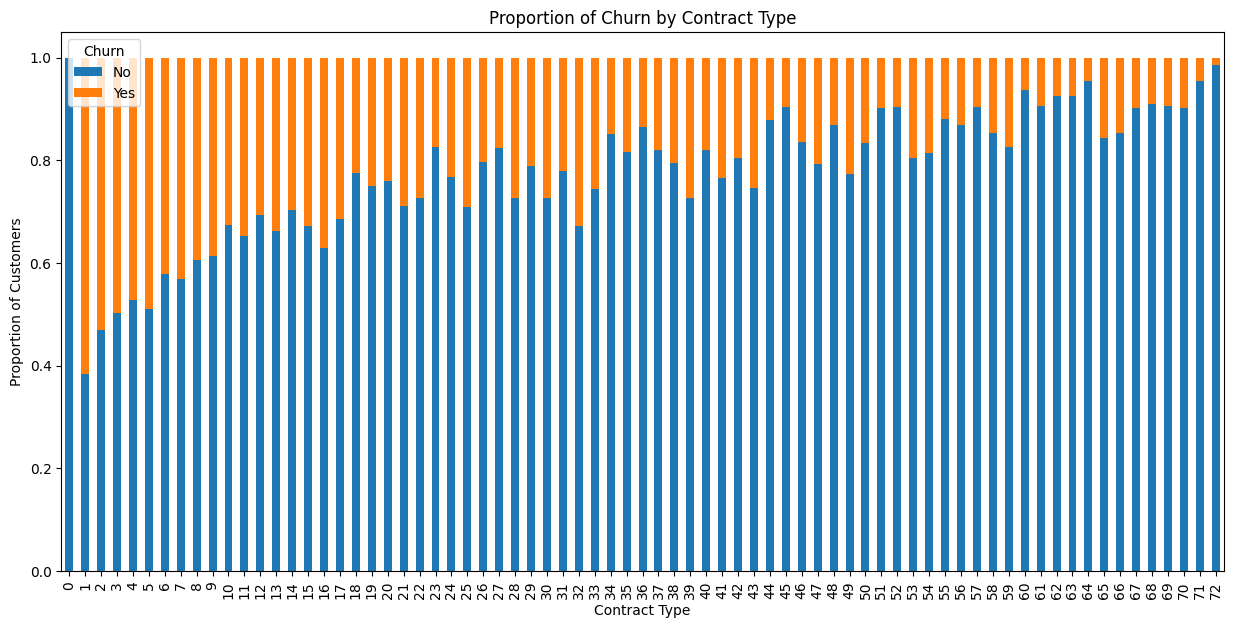

In [53]:
df_train['tenure'] = df_train['tenure'].astype('category')

contract_churn = df_train.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title("Proportion of Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Proportion of Customers")
plt.legend(title='Churn')
plt.show()

/tmp/ipython-input-1246319572.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = df_train.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()


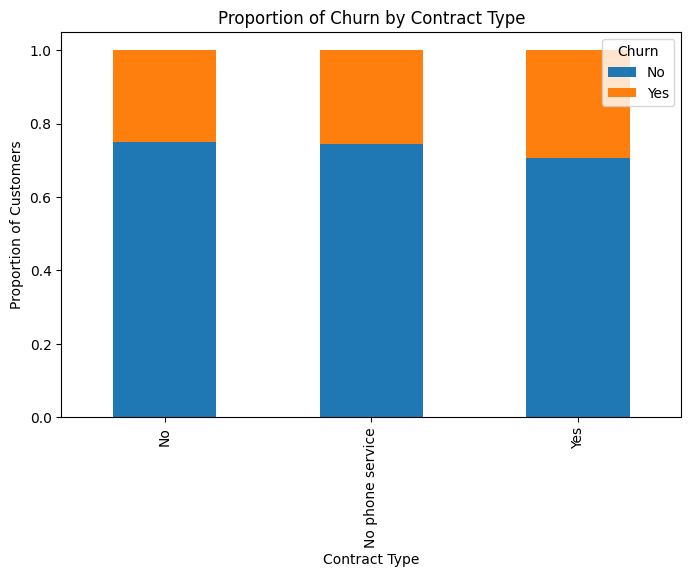

In [56]:
df_train['MultipleLines'] = df_train['MultipleLines'].astype('category')

contract_churn = df_train.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Proportion of Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Proportion of Customers")
plt.legend(title='Churn')
plt.show()

<Axes: >

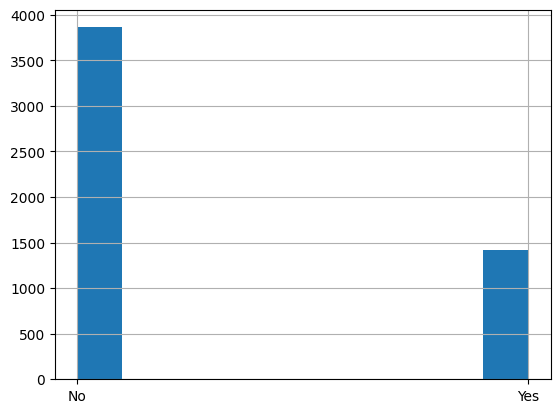

In [63]:
df_train['Churn'].hist()